###	Processed Data Importing

In [ ]:
# First we import the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load processed data
eurobank = pd.read_csv('processed_data.csv')

In [ ]:
print("\nVerifying the loaded processed data:")
eurobank.head()


Verifying the loaded processed data:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


### Last Contact of The Current Campaign Analysis

C:\Users\Dhruv Khanna\AppData\Local\Temp\ipykernel_6692\1492277435.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subscribers['duration'] = subscribers['duration'] / 60  # Convert seconds to minutes
C:\Users\Dhruv Khanna\AppData\Local\Temp\ipykernel_6692\1492277435.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_subscribers['duration'] = non_subscribers['duration'] / 60  # Convert seconds to minutes


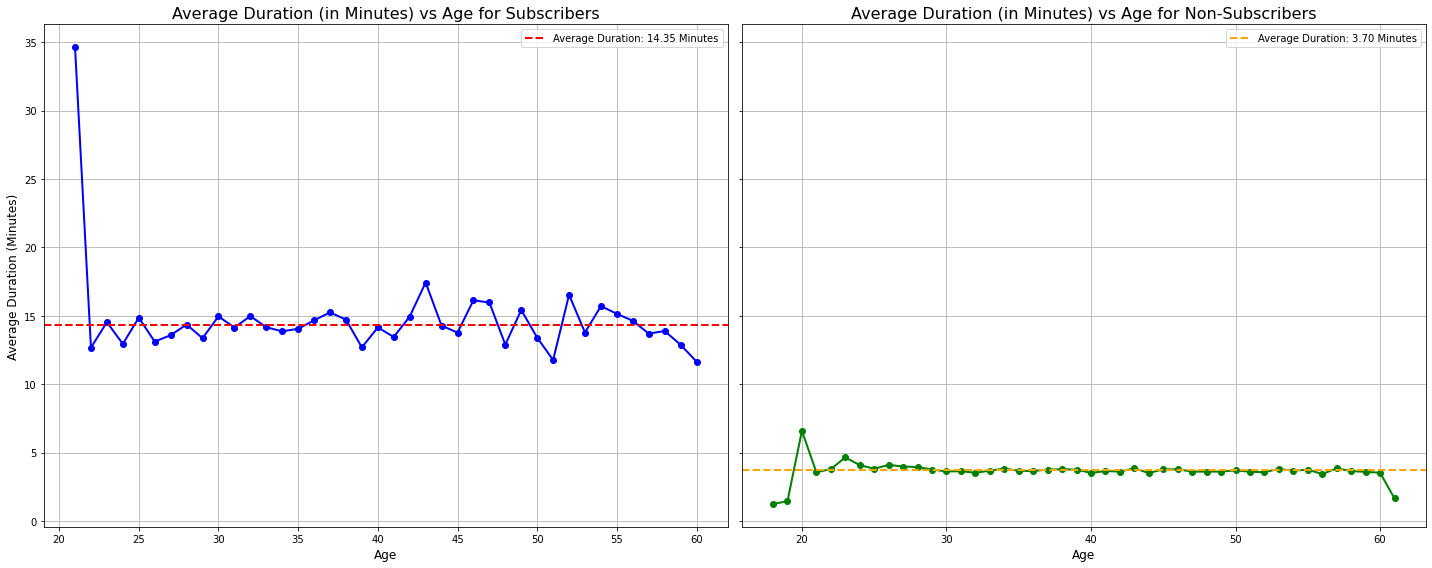

In [ ]:
# Filter for subscribers and non-subscribers
subscribers = eurobank[eurobank['y'] == 'yes']
non_subscribers = eurobank[eurobank['y'] == 'no']

if subscribers['duration'].max() > 60:
    subscribers['duration'] = subscribers['duration'] / 60
if non_subscribers['duration'].max() > 60:
    non_subscribers['duration'] = non_subscribers['duration'] / 60

avg_duration_sub = subscribers.groupby('age')['duration'].mean().reset_index()
avg_duration_non_sub = non_subscribers.groupby('age')['duration'].mean().reset_index()

overall_avg_duration_sub = subscribers['duration'].mean()
overall_avg_duration_non_sub = non_subscribers['duration'].mean()

fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Plot for subscribers
axs[0].plot(avg_duration_sub['age'], avg_duration_sub['duration'], marker='o', linestyle='-', color='blue', linewidth=2, markersize=6)
axs[0].axhline(y=overall_avg_duration_sub, color='red', linestyle='--', linewidth=2, label=f'Average Duration: {overall_avg_duration_sub:.2f} Minutes')
axs[0].set_title('Average Duration (in Minutes) vs Age for Subscribers', fontsize=16)
axs[0].set_xlabel('Age', fontsize=12)
axs[0].set_ylabel('Average Duration (Minutes)', fontsize=12)
axs[0].legend()
axs[0].grid(True)

# Plot for non-subscribers
axs[1].plot(avg_duration_non_sub['age'], avg_duration_non_sub['duration'], marker='o', linestyle='-', color='green', linewidth=2, markersize=6)
axs[1].axhline(y=overall_avg_duration_non_sub, color='orange', linestyle='--', linewidth=2, label=f'Average Duration: {overall_avg_duration_non_sub:.2f} Minutes')
axs[1].set_title('Average Duration (in Minutes) vs Age for Non-Subscribers', fontsize=16)
axs[1].set_xlabel('Age', fontsize=12)
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

### Term Deposit Subscription by Contact Type

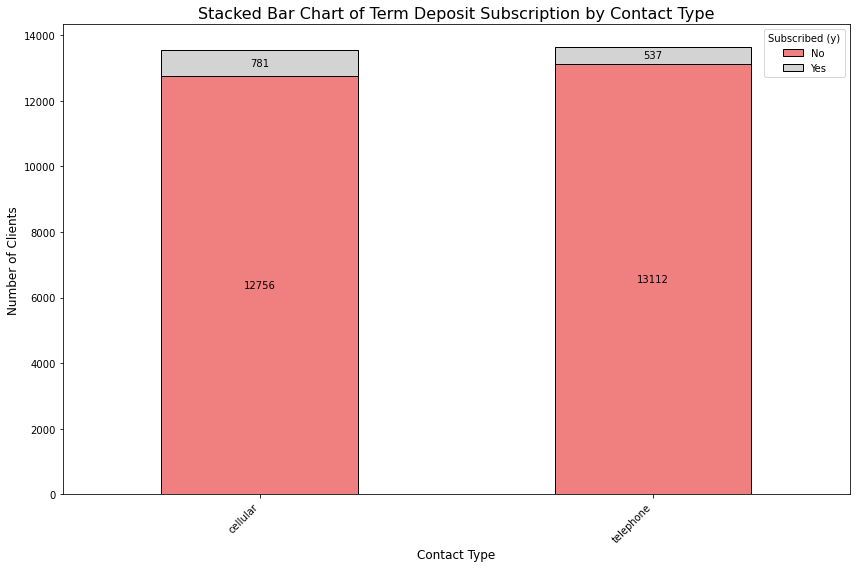

In [ ]:
# Filter out 'unknown' contact type
eurobank_filtered = eurobank[eurobank['contact'] != 'unknown']

# Group the data by contact type and the target variable (y) to count subscribers and non-subscribers
contact_counts = eurobank_filtered.groupby(['contact', 'y']).size().unstack().fillna(0)

colors = ['lightcoral', 'lightgrey']

ax = contact_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors, edgecolor='black')

plt.title('Stacked Bar Chart of Term Deposit Subscription by Contact Type', fontsize=16)
plt.xlabel('Contact Type', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.legend(title='Subscribed (y)', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels

for container in ax.containers:
    ax.bar_label(container, label_type='center')  # Display the numbers within the bars

plt.tight_layout()
plt.show()

### Contact Duration by Contact Mode for Different Age Groups

C:\Users\Dhruv Khanna\AppData\Local\Temp\ipykernel_6692\1551501266.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subscribers['age_group'] = pd.cut(subscribers['age'], bins=age_bins, labels=age_labels)


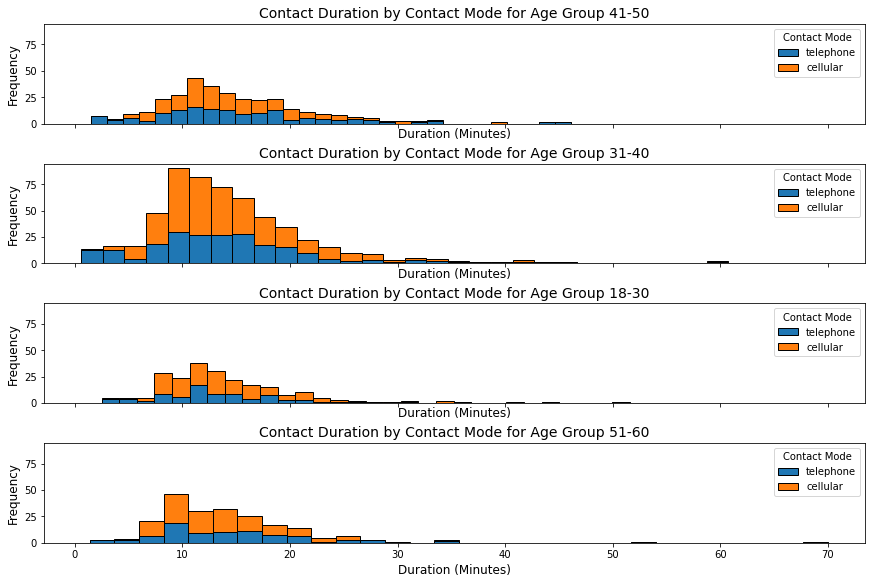

In [ ]:
# Convert duration from seconds to minutes
eurobank['duration'] = eurobank['duration'] / 60

# Filter for subscribers
subscribers = eurobank[eurobank['y'] == 'yes']

# Define age bins and labels
age_bins = [18, 30, 40, 50, 60, 70, 100]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71+']
subscribers['age_group'] = pd.cut(subscribers['age'], bins=age_bins, labels=age_labels)

contact_modes = subscribers['contact'].unique()
age_groups = subscribers['age_group'].unique()

fig, axes = plt.subplots(len(age_groups), 1, figsize=(12, 8), sharex=True, sharey=True, constrained_layout=True)

for i, age_group in enumerate(age_groups):
    ax = axes[i]
    data = subscribers[subscribers['age_group'] == age_group]

    hist_data = [data[data['contact'] == mode]['duration'] for mode in contact_modes]

    ax.hist(hist_data, bins=30, stacked=True, label=contact_modes, edgecolor='black')

    ax.set_title(f'Contact Duration by Contact Mode for Age Group {age_group}', fontsize=14)
    ax.set_xlabel('Duration (Minutes)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend(title='Contact Mode', loc='upper right')

plt.show()
